## Premier league 2022-2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os.path
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

### Setup Chrome Driver Driver and Data Scraping

In [2]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Set path to chromedriver as per your configuration
homedir = os.path.expanduser("~")
webdriver_service = Service(f"{homedir}/chromedriver/stable/chromedriver")

# Choose Chrome Browser
browser = webdriver.Chrome(service=webdriver_service, options=chrome_options)

# Get page
browser.get("https://dataviz.theanalyst.com/football-season-metrics/?competitionId=8&seasonId=2022")

page_source = BeautifulSoup(browser.page_source, 'lxml')

# Get the data in the script
raw_table = page_source.find_all('table')

In [3]:
clubs_epl_head = []
clubs_epl = []

for club_row in raw_table[2].thead:
    club_head = []
    for col in club_row:
        club_head.append(col.text)
    clubs_epl_head.append(club_head)

for club_row in raw_table[2].tbody:
    club = []
    for idx, col in enumerate(club_row):
        if idx > 1:
            club.append(float(col.text))    
        else:
            club.append(col.text)
    clubs_epl.append(club)

data_epl = pd.DataFrame(clubs_epl, columns=clubs_epl_head[1])

data_epl.set_index('pos', inplace=True)
data_epl

,team,sequence time,passes per sequence,direct speed,10+ pass OP sequences,build up attacks,direct attacks
pos,,,,,,,
1,Manchester City,15.38,5.30,0.98,851.0,224.0,52.0
2,Arsenal,11.49,4.11,1.25,580.0,157.0,62.0
3,Manchester United,9.62,3.68,1.35,423.0,98.0,102.0
4,Newcastle United,8.64,3.18,1.51,275.0,63.0,95.0
5,Liverpool,10.54,4.07,1.45,616.0,120.0,85.0
6,Brighton and Hove Albion,11.09,4.10,1.29,593.0,140.0,60.0
7,Aston Villa,9.03,3.19,1.30,313.0,72.0,44.0
8,Tottenham Hotspur,10.12,3.75,1.33,416.0,100.0,68.0
9,Brentford,7.24,2.77,1.49,217.0,31.0,38.0


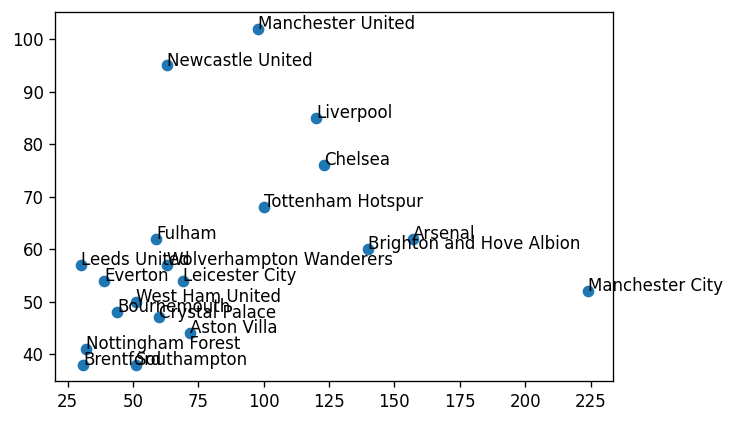

In [4]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(data_epl["build up attacks"], data_epl["direct attacks"])

for i, txt in enumerate(data_epl["team"]):
    ax.annotate(txt, (data_epl["build up attacks"][i], data_epl["direct attacks"][i]))
